In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

"""
Loading the data
"""
pd.options.display.max_colwidth = 1500
pd.options.display.max_rows = 1000

df = pd.read_csv(r'books_and_genres.csv')

# drop the extra index column
df = df.drop(columns=df.columns[0])

df.head()

,title,text,genres
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders\n\n\n\n\n SENECA\n\n APOCOLOCYNTOSIS\n\n WITH AN ENGLISH TRANSLATION BY\n\n W.H.D. ROUSE, M.A. LITT. D.\n\n MCMXX\n\n\n\n\n\nINTRODUCTION\n\nThis piece is ascribed to Seneca by ancient tradition; it is impossible\nto prove that it is his, and impossible to prove that it is not. The\nmatter will probably continue to be decided by every one according to his\nview of Seneca's character and abilities: in the matters of style and of\nsentiment much may be said on both sides. Dion Cassius (lx, 35) says that\nSeneca composed an [Greek: apokolokuntosis] or Pumpkinification of\nClaudius after his death, the title being a parody of the usual\n[Greek: apotheosis]; but this title is not given in the MSS. of the Ludus\nde Morte Claudii, nor is there anything in the piece which suits the title\nvery well.\n\nAs a literary form, the piece belongs to the class called\n_Satura Menippea_, a satiric medley in prose and verse.\n\nThis text is that of Buecheler, with a few trifling changes, which are\nindicated in the notes. We have been courteously allowed by Messrs\nWeidmann to use this text. I have to acknowledge the help of Mr Ball's\nnotes, from which I have taken a few references; but my translation was\nmade many years ago.\n\nW.H.D. ROUSE.\n\n\n\n\n\nBIBLIOGRAPHY\n\n_Editio Princeps:_ Lucii Annaei Senecae in morte\n Claudii Caesaris Lud...","{'21st-century', 'history', 'roman', 'classics', 'religion', 'novels', 'philosophy', 'fiction', 'literature', 'short-stories', 'politics', 'non-fiction', 'read-for-school', 'poetry', 'historical', 'humor'}"
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders\n\n\n\n\nTHE HOUSE ON THE BORDERLAND\n\nWilliam Hope Hodgson\n\n\n_From the Manuscript discovered in 1877 by Messrs. Tonnison and\nBerreggnog in the Ruins that lie to the South of the Village of\nKraighten, in the West of Ireland. Set out here, with Notes_.\n\n\nTO MY FATHER\n_(Whose feet tread the lost aeons)_\n\nOpen the door,\n And listen!\nOnly the wind's muffled roar,\n And the glisten\nOf tears 'round the moon.\n And, in fancy, the tread\nOf vanishing shoon--\n Out in the night with the Dead.\n\n""Hush! And hark\n To the sorrowful cry\nOf the wind in the dark.\n Hush and hark, without murmur or sigh,\n To shoon that tread the lost aeons:\n To the sound that bids you to die.\nHush and hark! Hush and Hark!""\n _Shoon of the Dead_\n\n\n\n\nAUTHOR'S INTRODUCTION TO THE MANUSCRIPT\n\nMany are the hours in which I have pondered upon the story that is set\nforth in the following pages. I trust that my instincts are not awry\nwhen they prompt me to leave the account, in simplicity, as it was\nhanded to me.\n\nAnd the MS. itself--You must picture me, when first it was given into my\ncare, turning it over, curiously, and making a swift, jerky examination.\nA small book it is; but thick, and all, save the last few pages, filled\nwith a quaint but legible handwriting, and writ very close. I have the\nqueer, faint, pit-water smell of it in my nostrils now as I write, and\nmy f...","{'horror', 'mystery', 'classics', 'science-fiction', 'fantasy', 'novels', 'literature', 'fiction', 'paranormal', '20th-century', 'adult', 'speculative-fiction', 'supernatural', 'dark'}"
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschner\nand the Online Distributed Proofreading Team.\n\n\n\n\nTHE WARRIORS\n\nBY ANNA ROBERTSON BROWN LINDSAY PH.D.\n\nAUTHOR OF\n\nWHAT IS WORTH WHILE?\nCULTURE AND REFORM\nTHE VICTORY OF OUR FAITH\n\n\n\n\nPREFACE\n\nThis work was begun nearly five years ago. Since then, the whole face of\nAmerican history has changed. We have had the Spanish-American War, and\nthe opening-up of our new possessions. In this period of time Gladstone,\nLi Hung Chang, and Queen Victoria have died; there has also occurred the\nassassination of the Empress of Austria and of President McKinley. There\nhas bee

In [4]:
"""
Basic formatting
"""
# stringify all text
df['text'] = df['text'].map(str)
df = df.replace({r'\r\n|\r|\n': ' '}, regex=True)

df.head(5)

,title,text,genres
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders SENECA APOCOLOCYNTOSIS WITH AN ENGLISH TRANSLATION BY W.H.D. ROUSE, M.A. LITT. D. MCMXX INTRODUCTION This piece is ascribed to Seneca by ancient tradition; it is impossible to prove that it is his, and impossible to prove that it is not. The matter will probably continue to be decided by every one according to his view of Seneca's character and abilities: in the matters of style and of sentiment much may be said on both sides. Dion Cassius (lx, 35) says that Seneca composed an [Greek: apokolokuntosis] or Pumpkinification of Claudius after his death, the title being a parody of the usual [Greek: apotheosis]; but this title is not given in the MSS. of the Ludus de Morte Claudii, nor is there anything in the piece which suits the title very well. As a literary form, the piece belongs to the class called _Satura Menippea_, a satiric medley in prose and verse. This text is that of Buecheler, with a few trifling changes, which are indicated in the notes. We have been courteously allowed by Messrs Weidmann to use this text. I have to acknowledge the help of Mr Ball's notes, from which I have taken a few references; but my translation was made many years ago. W.H.D. ROUSE. BIBLIOGRAPHY _Editio Princeps:_ Lucii Annaei Senecae in morte Claudii Caesaris Ludus nuper repertus: Rome, 1513. _Latest critical...","{'21st-century', 'history', 'roman', 'classics', 'religion', 'novels', 'philosophy', 'fiction', 'literature', 'short-stories', 'politics', 'non-fiction', 'read-for-school', 'poetry', 'historical', 'humor'}"
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders THE HOUSE ON THE BORDERLAND William Hope Hodgson _From the Manuscript discovered in 1877 by Messrs. Tonnison and Berreggnog in the Ruins that lie to the South of the Village of Kraighten, in the West of Ireland. Set out here, with Notes_. TO MY FATHER _(Whose feet tread the lost aeons)_ Open the door, And listen! Only the wind's muffled roar, And the glisten Of tears 'round the moon. And, in fancy, the tread Of vanishing shoon-- Out in the night with the Dead. ""Hush! And hark To the sorrowful cry Of the wind in the dark. Hush and hark, without murmur or sigh, To shoon that tread the lost aeons: To the sound that bids you to die. Hush and hark! Hush and Hark!"" _Shoon of the Dead_ AUTHOR'S INTRODUCTION TO THE MANUSCRIPT Many are the hours in which I have pondered upon the story that is set forth in the following pages. I trust that my instincts are not awry when they prompt me to leave the account, in simplicity, as it was handed to me. And the MS. itself--You must picture me, when first it was given into my care, turning it over, curiously, and making a swift, jerky examination. A small book it is; but thick, and all, save the last few pages, filled with a quaint but legible handwriting, and writ very close. I have the queer, faint, pit-water smell of it in my nostrils now as I write, and my fingers have subconscious memories of the soft, ""clo...","{'horror', 'mystery', 'classics', 'science-fiction', 'fantasy', 'novels', 'literature', 'fiction', 'paranormal', '20th-century', 'adult', 'speculative-fiction', 'supernatural', 'dark'}"
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschner and the Online Distributed Proofreading Team. THE WARRIORS BY ANNA ROBERTSON BROWN LINDSAY PH.D. AUTHOR OF WHAT IS WORTH WHILE? CULTURE AND REFORM THE VICTORY OF OUR FAITH PREFACE This work was begun nearly five years ago. Since then, the whole face of American history has changed. We have had the Spanish-American War, and the opening-up of our new possessions. In this period of time Gladstone, Li Hung Chang, and Queen Victoria have died; there has also occurred the assassination of the Empress of Austria and of President McKinley. There has been the Chinese persecution, the destruction of Galveston by storm and of Martinique by volcanic 

In [5]:
"""
Methods that will be used in the next block to try to source a published date
"""
import re
import roman;
from roman import InvalidRomanNumeralError

# regex for finding Gregorian or Roman publish dates
rn_year_regex = r'\b(.[M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3}))]{3,})\b'
modern_year_regex = r'(\b\d{4}\b)'
valid_year_regex = f'{modern_year_regex}|{rn_year_regex}'

# methods for finding above regex matches in text
find_year = re.compile('('+rn_year_regex+'|'+modern_year_regex+')');
find_modern_year = re.compile('('+modern_year_regex+')')

def is_right_era(int_date):
    return 1000 < int_date < 1922

def get_valid_date(date):
    try:
        int_date = int(date)
    except (ValueError, TypeError):
        return 0
    
    if is_right_era(int_date):
        return int_date
    
    return 0

def convert_date(date):
    if date == 'no date':
        return 0
    
    valid_date = get_valid_date(date)
    if valid_date:
        return valid_date
    
    try:
        number = roman.fromRoman(date.strip())
    except (InvalidRomanNumeralError, TypeError, AttributeError) as e:
        return 0
    
    valid_date = get_valid_date(number)
    return int(number)




In [6]:
"""
Try to source a published date from the intro text of each book and write to new "year" column
"""

# try to find either a Roman or Gregorian year within the text of each book, and insert into the "year" column
df['year'] = df['text'].map(lambda t: (find_year.search( t[0:1000]) or ["no date"])[0])

# no date before
print(len(df.loc[df['year'] == 'no date']))
df['year'] = df['year'].map(convert_date)

# no date after :(
print(len(df.loc[df['year'] == 0]))


3721
4797


In [7]:
"""
Methods that will be used in the next block to try to source published date from Google Books
"""

import requests
import time

# ADD YOUR GOOGLE BOOKS API CLIENT SECRET HERE IF YOU WOULD LIKE TO RUN THIS PORTION
secret = ''

def is_valid_date(date):
    try:
        int_date = int(date)
    except ValueError:
        return False
    return is_right_era(int_date)

def find_publication_year_from_item(item):
    published_date = item['volumeInfo'].get('publishedDate', '')
    if published_date and is_valid_date(published_date):
        return published_date
    
    # if there is no valid publishedDate, search in the description text of the response
    description = item['volumeInfo'].get('description', '')
    possible_dates = [date[0] for date in find_modern_year.findall(description) if is_valid_date(date[0])]
    if possible_dates:
        return min(possible_dates)

# check the Google Books API by a book's title in order to get the publication year
def get_publication_year(title):
    if not secret:
        print('Please assign value to "secret" variable above with your Google Books API key')
        return
    
    # avoid per-minute rate limiting
    time.sleep(0.05)
    url = f'https://www.googleapis.com/books/v1/volumes?q={title}&key={secret}'
    response = requests.get(url)
    
    try:
        items = response.json()['items']
    except KeyError as e:
        print('No matches found for ', title, response.json())
        return 0
    
    possible_years = [found for item in items if (found := find_publication_year_from_item(item)) is not None]
    if possible_years:
        year = min(possible_years)
        print(f'{title}: {year}')
        return year
    
    print('could not find year for title ', title)
    return 0


In [9]:
"""
Loop over the rows missing a publication year and run the above methods to attempt to fill it.
This needs to be done in batches because of rate limiting.

CSV with saved results imported in file in leui of live fetching. See commented out block below
if you would like to test it (you will need a Google Book API client key)
"""

# If you would like to test this out, uncomment the block below and use your own secret key in the block above
# dfcopy = df.copy()[0:100]
# dfcopy.loc[dfcopy['year'] == 0, 'year'] = dfcopy.loc[dfcopy['year'] == 0]['title'].apply(get_publication_year)

# read from the already compiled set instead of fetching live from Google Books API
dfFull = pd.read_csv('fullset.csv')

# Extra formatting!
# Force the year into an int and the text into a string
dfFull.year = dfFull.year.astype('int')
dfFull['text'] = dfFull['text'].astype(str)

# Drop the "genres" column as we will not use it
dfFull = dfFull.drop("genres", axis=1)

dfFull.head(3)

,title,text,year
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders SENECA APOCOLOCYNTOSIS WITH AN ENGLISH TRANSLATION BY W.H.D. ROUSE, M.A. LITT. D. MCMXX INTRODUCTION This piece is ascribed to Seneca by ancient tradition; it is impossible to prove that it is his, and impossible to prove that it is not. The matter will probably continue to be decided by every one according to his view of Seneca's character and abilities: in the matters of style and of sentiment much may be said on both sides. Dion Cassius (lx, 35) says that Seneca composed an [Greek: apokolokuntosis] or Pumpkinification of Claudius after his death, the title being a parody of the usual [Greek: apotheosis]; but this title is not given in the MSS. of the Ludus de Morte Claudii, nor is there anything in the piece which suits the title very well. As a literary form, the piece belongs to the class called _Satura Menippea_, a satiric medley in prose and verse. This text is that of Buecheler, with a few trifling changes, which are indicated in the notes. We have been courteously allowed by Messrs Weidmann to use this text. I have to acknowledge the help of Mr Ball's notes, from which I have taken a few references; but my translation was made many years ago. W.H.D. ROUSE. BIBLIOGRAPHY _Editio Princeps:_ Lucii Annaei Senecae in morte Claudii Caesaris Ludus nuper repertus: Rome, 1513. _Latest critical...",1920
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders THE HOUSE ON THE BORDERLAND William Hope Hodgson _From the Manuscript discovered in 1877 by Messrs. Tonnison and Berreggnog in the Ruins that lie to the South of the Village of Kraighten, in the West of Ireland. Set out here, with Notes_. TO MY FATHER _(Whose feet tread the lost aeons)_ Open the door, And listen! Only the wind's muffled roar, And the glisten Of tears 'round the moon. And, in fancy, the tread Of vanishing shoon-- Out in the night with the Dead. ""Hush! And hark To the sorrowful cry Of the wind in the dark. Hush and hark, without murmur or sigh, To shoon that tread the lost aeons: To the sound that bids you to die. Hush and hark! Hush and Hark!"" _Shoon of the Dead_ AUTHOR'S INTRODUCTION TO THE MANUSCRIPT Many are the hours in which I have pondered upon the story that is set forth in the following pages. I trust that my instincts are not awry when they prompt me to leave the account, in simplicity, as it was handed to me. And the MS. itself--You must picture me, when first it was given into my care, turning it over, curiously, and making a swift, jerky examination. A small book it is; but thick, and all, save the last few pages, filled with a quaint but legible handwriting, and writ very close. I have the queer, faint, pit-water smell of it in my nostrils now as I write, and my fingers have subconscious memories of the soft, ""clo...",1877
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschner and the Online Distributed Proofreading Team. THE WARRIORS BY ANNA ROBERTSON BROWN LINDSAY PH.D. AUTHOR OF WHAT IS WORTH WHILE? CULTURE AND REFORM THE VICTORY OF OUR FAITH PREFACE This work was begun nearly five years ago. Since then, the whole face of American history has changed. We have had the Spanish-American War, and the opening-up of our new possessions. In this period of time Gladstone, Li Hung Chang, and Queen Victoria have died; there has also occurred the assassination of the Empress of Austria and of President McKinley. There has been the Chinese persecution, the destruction of Galveston by storm and of Martinique by volcanic action. Wireless telegraphy has been discovered, and the source of the spread of certain fevers. In this time have been carried on gigantic engineering undertakings,--the Trans-Siberian Railroad, the Trans-Balkan Railroad, the rebuilding of New York. We have also looked upon the consolidation of vast forces of steel, iron, sugar, shipping, and other trusts. We have witnessed an extrao

In [10]:
MIN_FULL_TEXT = 25000
def is_acceptable_length(text, length=MIN_FULL_TEXT):
    if type(text) != str:
        return False
    if len(text) < length:
        return False


In [11]:
print('Book count before removing undated and outliers: ', len(dfFull))

print('Number of books without dates to be removed: ', len(dfFull.loc[dfFull.year == 0]))
dfFull = dfFull.drop(dfFull[dfFull.year== 0].index)

# drop the books from before 1775 - not enough examples
print('Number of books from before 1775, to be removed: ', len(dfFull.loc[dfFull.year<1775]))
dfFull = dfFull.drop(dfFull[dfFull.year < 1775].index)

# drop books after 1922 - these are errors
print('Number of books from after 1922, to be removed: ', len(dfFull.loc[dfFull.year>1922]))
dfFull = dfFull.drop(dfFull[dfFull.year > 1922].index)

# drop any books without text or not enough text
print('Number of books with too short or absent text, to be removed: ', len(dfFull[dfFull.text.apply(is_acceptable_length) == False]))
dfFull = dfFull.drop(dfFull[dfFull.text.apply(is_acceptable_length) == False].index)

print('New book count: ', len(dfFull))

dfFull.head(2)

Book count before removing undated and outliers:  10633
Number of books without dates to be removed:  946
Number of books from before 1775, to be removed:  975
Number of books from after 1922, to be removed:  143
Number of books with too short or absent text, to be removed:  679
New book count:  7890


,title,text,year
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders SENECA APOCOLOCYNTOSIS WITH AN ENGLISH TRANSLATION BY W.H.D. ROUSE, M.A. LITT. D. MCMXX INTRODUCTION This piece is ascribed to Seneca by ancient tradition; it is impossible to prove that it is his, and impossible to prove that it is not. The matter will probably continue to be decided by every one according to his view of Seneca's character and abilities: in the matters of style and of sentiment much may be said on both sides. Dion Cassius (lx, 35) says that Seneca composed an [Greek: apokolokuntosis] or Pumpkinification of Claudius after his death, the title being a parody of the usual [Greek: apotheosis]; but this title is not given in the MSS. of the Ludus de Morte Claudii, nor is there anything in the piece which suits the title very well. As a literary form, the piece belongs to the class called _Satura Menippea_, a satiric medley in prose and verse. This text is that of Buecheler, with a few trifling changes, which are indicated in the notes. We have been courteously allowed by Messrs Weidmann to use this text. I have to acknowledge the help of Mr Ball's notes, from which I have taken a few references; but my translation was made many years ago. W.H.D. ROUSE. BIBLIOGRAPHY _Editio Princeps:_ Lucii Annaei Senecae in morte Claudii Caesaris Ludus nuper repertus: Rome, 1513. _Latest critical...",1920
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders THE HOUSE ON THE BORDERLAND William Hope Hodgson _From the Manuscript discovered in 1877 by Messrs. Tonnison and Berreggnog in the Ruins that lie to the South of the Village of Kraighten, in the West of Ireland. Set out here, with Notes_. TO MY FATHER _(Whose feet tread the lost aeons)_ Open the door, And listen! Only the wind's muffled roar, And the glisten Of tears 'round the moon. And, in fancy, the tread Of vanishing shoon-- Out in the night with the Dead. ""Hush! And hark To the sorrowful cry Of the wind in the dark. Hush and hark, without murmur or sigh, To shoon that tread the lost aeons: To the sound that bids you to die. Hush and hark! Hush and Hark!"" _Shoon of the Dead_ AUTHOR'S INTRODUCTION TO THE MANUSCRIPT Many are the hours in which I have pondered upon the story that is set forth in the following pages. I trust that my instincts are not awry when they prompt me to leave the account, in simplicity, as it was handed to me. And the MS. itself--You must picture me, when first it was given into my care, turning it over, curiously, and making a swift, jerky examination. A small book it is; but thick, and all, save the last few pages, filled with a quaint but legible handwriting, and writ very close. I have the queer, faint, pit-water smell of it in my nostrils now as I write, and my fingers have subconscious memories of the soft, ""clo...",1877


Histogram of the distribution of publication year. Data is heavily skewed towards the later years of the set. The first 75 years of the dataset contains only ~1/3 of the total amount of books, while the last 72 years of the date range of the set contains 2/3rds of the total books. A full 45% of the books are from 1900-1922.

Between 1775-1850 books: 31%
Between 1850-1900 books:24%
Between 1900-1922 books 45%


Text(0.5, 1.05, 'Distribution of books across year published')

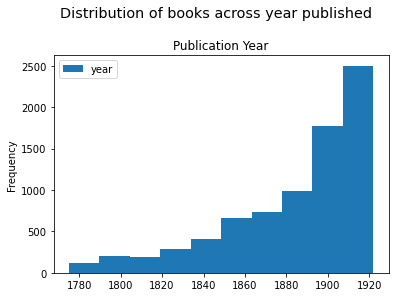

In [12]:
import matplotlib.pyplot as plt
# uncomment this statement to see the count for each year
# print(dfFull['year'].value_counts(ascending=True).sort_index())
print(f'Between 1775-1850 books: {round(len(dfFull.loc[dfFull.year<1875])/len(dfFull)*100)}%')
print(f'Between 1850-1900 books:{round(len(dfFull.loc[(dfFull.year>=1875) & (dfFull.year < 1900)])/len(dfFull)*100)}%')
print(f'Between 1900-1922 books {round(len(dfFull.loc[(dfFull.year>=1900)& (dfFull.year <= 1922)])/len(dfFull)*100)}%')

dfFull.plot(kind='hist', title='Publication Year')
plt.suptitle('Distribution of books across year published', x=0.5, y=1.05, ha='center', fontsize='x-large')

In [18]:
# """
# Create split between training and testing books
# """

# dfByYear = dfFull.groupby(['year'])['title'].count().reset_index(
#   name='Count').sort_values(['year'])

# pd.concat([dfByYear.head(2), dfByYear.tail(2)])

# def split_test_train(row):
#     books_from_year = list(dfTest[dfTest.year == row['year']].index)
#     print(len(books_from_year))
#     print(row.keys())

# dfTest = dfFull.copy()
# dfTest.apply(split_test_train, axis=1)

To have a more even distribution of the dataset, as well as to have more manageable data points that the text of an entire book, I create 200 data points for each year represented in the set. The 200 points are 5000 character portions of the books attributed to that year. For years with only a few books, the points from that year will have less variety, perhaps yielding worse results than the years with a variety of different books. I do this before tokenizing and other processing the text as the process will be less intense once the texts have been truncated.

In [64]:
"""
Create new dataframe for final data. Each year will have 200 rows, each with a unique portion of text sourced
from a book published in that year
"""

all_years = []
PER_YEAR_COUNT = 200

for year in range(1775, 1923):
    years = [year]*PER_YEAR_COUNT
    all_years.extend(years)

print(len(all_years))
dfPas = pd.DataFrame(columns = ['title', 'passage', 'year'])
dfPas['year'] = all_years
dfPas['index'] = dfPas.index


pd.concat([dfPas.head(2), dfPas.tail(2)])

29600


,title,passage,year,index
0,NaN,NaN,1775,0
1,NaN,NaN,1775,1
29598,NaN,NaN,1922,29598
29599,NaN,NaN,1922,29599


In [65]:
import random
import copy
PASSAGE_LENGTH = 5000

dfFullCopy = dfFull.copy()
no_continue_list = []

def get_full_text(row):
    index = row['index']
    index_for_year = index % PER_YEAR_COUNT

    books_from_year = list(dfFullCopy[dfFullCopy.year == row['year']].index)
    books_from_year_original = list(dfFull[dfFull.year == row['year']].index)
    # we have exhausted all the text from the books from this year. There are a few "bad" years with only 4 books
    if not len(books_from_year):
        print(f'THERE ARE NO BOOKS LEFT FOR {row.year}. NOT CONTINUING WITH THIS YEAR.')
        raise ValueError('Depleted books')
    
    index_in_book_list = index_for_year % len(books_from_year)
    book_index = books_from_year[index_in_book_list]
    
    book = dfFullCopy.loc[book_index]
    
    # testing books are every 5th book for each year according to the original dataset - 20% of books
    # or if there are fewer than 5 books, the first book
    testing_books = books_from_year_original[::5]
    row['test'] = book_index == 0 if len(books_from_year_original) < 5 else book_index in testing_books 
    
    full_text = copy.copy(book['text'])

    return (full_text, book_index, book['title'])

def get_passage(row):
    if row['year'] in no_continue_list:
        return
    
    try:
        full_text, book_index, book_title = get_full_text(row)
    except ValueError:
        no_continue_list.append(row['year'])
        return
        
    # print(f'Creating excerpt for {row.year}: from {book_title}.')
    
    max_start_point = len(full_text) - PASSAGE_LENGTH
    start_point = random.randint(0, max_start_point)
    end_point = start_point+PASSAGE_LENGTH
    passage = full_text[start_point:end_point]
    
    if not len(passage) == PASSAGE_LENGTH:
        print(f'SOMETHING WENT WRONG FOR BOOK {book_title}')
        return
        
    # Remove the used text from the original dataframe if remaining text is less than the passage length, remove the book
    # Otherwise remove the used text from the existing full text and replace the modified text in the original df
    full_text_modified = full_text[:start_point] + full_text[end_point:]
    if len(full_text_modified) < PASSAGE_LENGTH:
        print(f'dropping book: {book_title} at index {book_index} from year {row.year}')
        dfFullCopy.drop([book_index], inplace=True)
    else:
        dfFullCopy.at[book_index,'text'] = full_text_modified
        new_text_length = len(dfFullCopy.loc[book_index]['text'])
    
        if not new_text_length < len(full_text):
            print(f'SOMETHING WENT WRONG FOR BOOK {book_title}')
            return
        
    row['passage'] = passage  
    row['title'] = book_title
    # print(f'Success! {len(row.passage)} char passage created for {book_title}.')

    return row


dfPas = dfPas.apply(get_passage, axis=1)
pd.concat([dfPas.head(2), dfPas.tail(2)])

dropping book: st patricks day at index 10381 from year 1775
dropping book: the duenna at index 10433 from year 1775
dropping book: le nouveau dictionnaire at index 5891 from year 1776
dropping book: prisoners of the revolution at index 9467 from year 1776
dropping book: faithfully yours at index 5408 from year 1777
dropping book: dominica at index 5675 from year 1777
dropping book: aslaugas knight at index 6720 from year 1777
dropping book: proeve van kleine gedigten at index 2602 from year 1778
dropping book: proeve van kleine gedigten at index 3600 from year 1778
dropping book: percy at index 7675 from year 1778
dropping book: logbook of timothy boardman at index 5929 from year 1778
dropping book: edouard at index 6189 from year 1778
dropping book: die argonauten at index 8997 from year 1779
dropping book: thankful blossom at index 4368 from year 1779
dropping book: paul jones at index 6877 from year 1779
dropping book: die erziehung des at index 9361 from year 1780
dropping book: t

,title,passage,year,index,test
0,thomas jefferson,"his speeches with ""unbounded thirst for ridiculous pomp, foolish adulation and a selfish avarice,"" certainly mild expressions compared with what are heard in these times, but because of their utterance, Mr. Lyon spent four months in jail and paid a fine of $1000. When he had served out his term and been re-elected, a strong effort was made to prevent his taking his seat. It failed and in 1840, his fine was returned to him with interest. It can well be understood that the passage and enforcement of such iniquitous measures caused alarm and indignation throughout the country. Edward Livingston declared that they would ""disgrace Gothic barbarism."" Jefferson's soul was stirred with the profoundest indignation. Under his inspiration, the Virginia assembly adopted resolutions calling on the state to nullify within its limits the enforcement of the Sedition act. The Alien and Sedition laws were declared unconstitutional, and the sister States were invited to unite in resisting them, ""in order to maintain unimpaired the authorities, rights and liberties reserved to the States respectively or to the people."" These views were not only those of Jefferson, but of Patrick Henry, George Mason and nearly all leading Virginians. Kentucky, the child of her loins, seconded the action of Virginia, urged thereto by Jefferson who moulded her resolutions. The revolt against the measures was so widespread that the Alien act was repealed in 1800, and the Sedition act in the following year....",1775.0,0.0,True
1,charles lamb,"d theretofore always maintained that those merely great heaps of earth ought to have no effect upon a properly constituted mind; but he freely confessed afterwards, that he had been mistaken. Lamb had been more than once invited to visit the romantic Lake country. He had no desire to inspect the Ural chain, where the malachite is hidden, nor the silver regions of Potosi; but he was all at once affected by a desire of ""visiting remote regions."" It was a sudden irritability, which could only be quieted by travel. Charles and his sister therefore went, without giving any notice to Coleridge, who, however, received them very kindly, and gave up all his time in order to show them the wonders of the neighborhood. The visitors arrived there in a ""gorgeous sunset"" (the only one that Lamb saw during his stay in the country), and thought that they had got ""into fairy-land."" ""We entered Coleridge's study"" (he writes to Manning, shortly afterwards) ""just in the dusk, when the mountains were all dark. Such an impression I never received from objects of sight, nor do I suppose I ever can again. Glorious creatures, Skiddaw, &c. I shall never forget how ye lay about that night, like an intrenchment; gone to bed, as it seemed, for the night."" They went to Coleridge's house, in which ""he had a large, antique, ill- shaped room, with an old organ, never played upon, an Aeolian harp, and shelves of scattered folios,"" and remained there three weeks, visiting Wordsworth's cottage, he himself ...",1775.0,1.0,False
29598,the beautiful and damned,"ustice. But he discovered that, when a subject did interest her, her brain tired less quickly than his. What he chiefly missed in her mind was the pedantic teleology--the sense of order and accuracy, the sense of life as a mysteriously correlated piece of patchwork, but he understood after a while that such a quality in her would have been incongruous. Of the things they possessed in common, greatest of all was their almost uncanny pull at each other's hearts. The day they left the hotel in Coronado she sat down on one of the beds while they were packing, and began to weep bitterly. ""Dearest--"" His arms were around her; he pulled her head down upon his shoulder. ""What is it, my own Gloria? Tell me."" ""We're going away,"" she sobbed. ""Oh, Anthony, it's sort of the first place we've lived together. Our two little beds here--side by side--the

All of the years are evenly distributed, except for three years that had very sparse data - less than four books each. 1781 only has 77 instances, 1791 only 87 instances, and 1784 has 166. This may yield less exact results for these years. In general, pre-1825 results will be worse than post-1825 as the amount of books available is relatively low for these years, meaning that there is less variety of examples of each year's text.

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

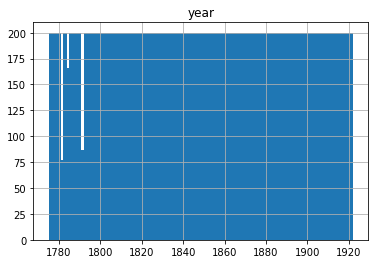

In [66]:
# histogram of datapoint distribution across years
dfPas.hist(column="year", bins=148)

In [90]:
"""
Delete rows without passages (from depleted years)
"""
print('Count before removal ',dfPas.shape[0])
dfPas = dfPas.drop(dfPas[dfPas.passage.apply(is_acceptable_length, length=(5000)) == False].index)
print('Count after removal ', dfPas.shape[0])


Count before removal  29330
Count after removal  29330


We have manually separate the training and testing data in the methods above rather than using a library. This is because we do not want to train the model to fit a specific book, but rather a specific year, therefor we must ensure that each book is either exclusively in the testing set or in the training set. The split comes to roughly 27% testing and 63% training

In [91]:
dfGrouped = dfPas.groupby(['test'])['test'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)

print(dfGrouped.head())

# Validate that the testing and training label is consistent per book - insert any book title here
dfPas[dfPas['title']=='thomas jefferson']['test']

    test  Count
0  False  23059
1   True   6271


0      True
11     True
22     True
33     True
44     True
55     True
66     True
77     True
90     True
100    True
110    True
120    True
130    True
140    True
150    True
160    True
170    True
180    True
198    True
Name: test, dtype: object

Save data to testing and training csvs


In [105]:
dfTest = dfPas[dfPas['test']==True].drop(columns=['test', 'index'])
dfTrain = dfPas[dfPas['test']==False].drop(columns=['test', 'index'])
print('Training count: ', dfTrain.shape[0])
print('Testing count: ', dfTest.shape[0])

dfTest.to_csv('testing.csv', index=False)
dfTrain.to_csv('training.csv', index=False)

Training count:  23059
Testing count:  6271


In [158]:
# """
# Methods for processing the excerpts
# """
# lemmatizer = WordNetLemmatizer()
# stop_words = list(stopwords.words('english'))

# # returns true if word should be filtered out (stop word, number, or length <= 2)
# def filter_word(word):
#     return word in stop_words or re.match('\d+', word) or len(word) <= 2

# delete_us = []
# def process_text(text):
#     # remove book intro text
#     text = text[100:]
#     text = text.lower()
#     text = word_tokenize(text)
#     text = [lemmatizer.lemmatize(word) for word in text]
#     text = [word for word in text if not filter_word(word)]
    
#     return text

# dfPasCopy = dfPas.copy()
# dfPasCopy['passage'] = dfPasCopy['passage'].apply(process_text)
# dfPasCopy.head()